#Import libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import matplotlib.colors

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics

In [ ]:
car = pd.read_csv('/content/car_price_prediction.csv.zip')

In [ ]:
car.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [ ]:
car.shape

(19237, 18)

In [ ]:
print(car.columns)

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')


In [ ]:
car.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [ ]:
car.isnull().sum()

,0
ID,0
Price,0
Levy,0
Manufacturer,0
Model,0
Prod. year,0
Category,0
Leather interior,0
Fuel type,0
Engine volume,0


In [ ]:
carcompany = []
for i in car['Model']:
    carcompany.append(str(i).split('j '))

In [ ]:
carcompany_array = np.array(carcompany, dtype=object)
display(carcompany_array)

array([['RX 450'],
       ['Equinox'],
       ['FIT'],
       ...,
       ['Tucson'],
       ['Captiva'],
       ['Sonata']], dtype=object)

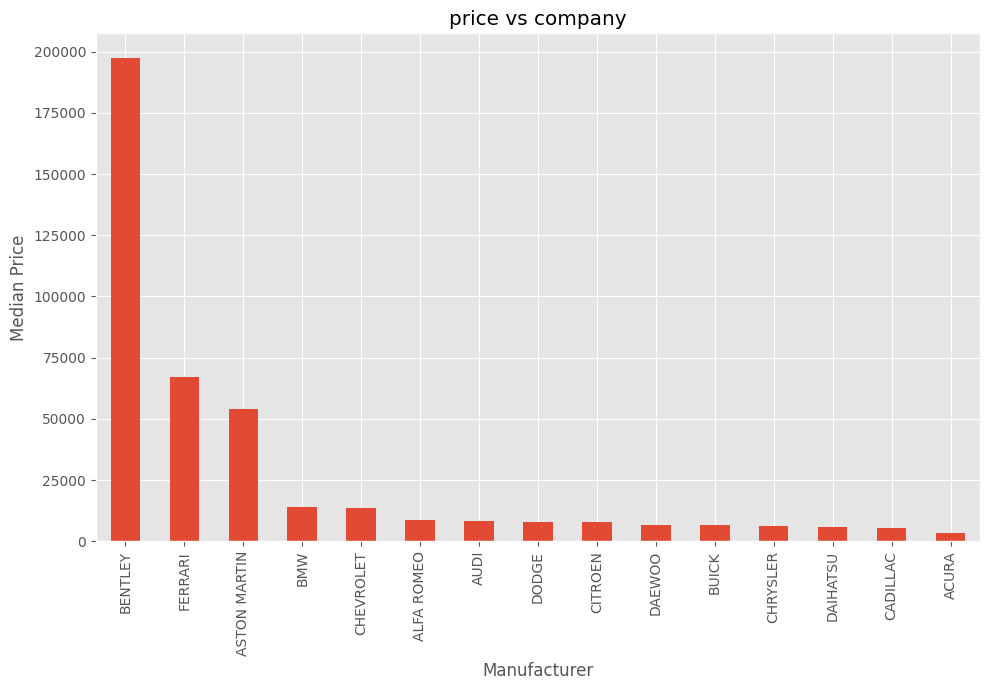

In [ ]:
with plt.style.context(('ggplot')):
    plt.figure(figsize=(10,7))
    # Group by 'Manufacturer' and plot the median price
    car.groupby('Manufacturer')['Price'].median()[:15].sort_values(ascending=False).plot(kind='bar')
    plt.title('Median Price by Manufacturer')
    plt.title("price vs company")
    plt.xlabel('Manufacturer')
    plt.ylabel('Median Price')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

In [ ]:
car['Model'] = car['Model'].astype('category').cat.codes
display(car.head())

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,1242,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,658,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,684,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,661,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,684,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [ ]:
print(car.columns)

Index(['ID', 'Price', 'Levy', 'Manufacturer', 'Model', 'Prod. year',
       'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage',
       'Cylinders', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color',
       'Airbags'],
      dtype='object')


In [ ]:
# Convert 'Levy' column to numeric, replacing '-' with NaN and then filling NaN with 0
car['Levy'] = pd.to_numeric(car['Levy'], errors='coerce').fillna(0)

# Select categorical columns to encode (excluding 'Model' which is already encoded)
categorical_cols = car.select_dtypes(include='object').columns.tolist()
# Exclude 'Model' if it's still in the list (it should not be after the previous step but as a safeguard)
if 'Model' in categorical_cols:
    categorical_cols.remove('Model')

# Apply one-hot encoding to the selected categorical columns
car_encoded = pd.get_dummies(car, columns=categorical_cols, drop_first=True)

display(car_encoded.head())

,ID,Price,Levy,Model,Prod. year,Cylinders,Airbags,Manufacturer_ALFA ROMEO,Manufacturer_ASTON MARTIN,Manufacturer_AUDI,...,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,45654403,13328,1399.0,1242,2010,6.0,12,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,44731507,16621,1018.0,658,2011,6.0,8,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,45774419,8467,0.0,684,2006,4.0,2,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,45769185,3607,862.0,661,2011,4.0,0,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,45809263,11726,446.0,684,2014,4.0,4,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [ ]:
# Define features (X) and target (y)
X = car_encoded.drop('Price', axis=1)
y = car_encoded['Price']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data splitting and scaling complete.")

Data splitting and scaling complete.


In [ ]:
X = car.drop('Price', axis=1)
y = car['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training Shape:", X_train.shape)
print("Testing Shape:", X_test.shape)

Training Shape: (15389, 17)
Testing Shape: (3848, 17)


In [ ]:
# Initialize and train the Linear Regression model
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred_lin_reg = linear_reg_model.predict(X_test_scaled)

# Evaluate the model
mse_lin_reg = mean_squared_error(y_test, y_pred_lin_reg)
r2_lin_reg = r2_score(y_test, y_pred_lin_reg)

print(f"Linear Regression - Mean Squared Error: {mse_lin_reg}")
print(f"Linear Regression - R-squared: {r2_lin_reg}")

Linear Regression - Mean Squared Error: 1503227142.3755705
Linear Regression - R-squared: -3.8242730233410036


In [ ]:
# Initialize and train the Decision Tree Regressor model
dec_tree_model = DecisionTreeRegressor(random_state=42)
dec_tree_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred_dec_tree = dec_tree_model.predict(X_test_scaled)

# Evaluate the model
mse_dec_tree = mean_squared_error(y_test, y_pred_dec_tree)
r2_dec_tree = r2_score(y_test, y_pred_dec_tree)

print(f"Decision Tree Regressor - Mean Squared Error: {mse_dec_tree}")
print(f"Decision Tree Regressor - R-squared: {r2_dec_tree}")

Decision Tree Regressor - Mean Squared Error: 173236579.99064448
Decision Tree Regressor - R-squared: 0.4440357442029753


#Train and evaluate gradient boosting regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the Gradient Boosting Regressor model
gbr_model = GradientBoostingRegressor(random_state=42)
gbr_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred_gbr = gbr_model.predict(X_test_scaled)

# Evaluate the model
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)

print(f"Gradient Boosting Regressor - Mean Squared Error: {mse_gbr}")
print(f"Gradient Boosting Regressor - R-squared: {r2_gbr}")

Gradient Boosting Regressor - Mean Squared Error: 165919075.6992914
Gradient Boosting Regressor - R-squared: 0.46751964597391404


#Train and evaluate random forest regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest Regressor model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the model
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Random Forest Regressor - Mean Squared Error: {mse_rf}")
print(f"Random Forest Regressor - R-squared: {r2_rf}")

Random Forest Regressor - Mean Squared Error: 84011341.7961984
Random Forest Regressor - R-squared: 0.7303842922623195


#Compare model performances

In [ ]:
print("--- Model Performance Comparison ---")
print(f"Linear Regression - Mean Squared Error: {mse_lin_reg}")
print(f"Linear Regression - R-squared: {r2_lin_reg}")
print("-" * 30)
print(f"Decision Tree Regressor - Mean Squared Error: {mse_dec_tree}")
print(f"Decision Tree Regressor - R-squared: {r2_dec_tree}")
print("-" * 30)
print(f"Gradient Boosting Regressor - Mean Squared Error: {mse_gbr}")
print(f"Gradient Boosting Regressor - R-squared: {r2_gbr}")
print("-" * 30)
print(f"Random Forest Regressor - Mean Squared Error: {mse_rf}")
print(f"Random Forest Regressor - R-squared: {r2_rf}")
print("-" * 30)

# Analyze and summarize the performance
print("\n--- Performance Summary ---")
print("Comparing the models based on Mean Squared Error (lower is better) and R-squared (higher is better):")

# Linear Regression: Very high MSE, negative R-squared indicates poor fit.
# Decision Tree Regressor: Lower MSE and positive R-squared compared to Linear Regression, but still high MSE and moderate R-squared.
# Gradient Boosting Regressor: Similar performance to Decision Tree, slightly better R-squared.
# Random Forest Regressor: Significantly lower MSE and highest R-squared among all models, indicating the best performance.

print("Based on the evaluation metrics:")
print(f"- Linear Regression performed poorly with a high MSE ({mse_lin_reg:.2f}) and a negative R-squared ({r2_lin_reg:.2f}).")
print(f"- Decision Tree Regressor showed improved performance over Linear Regression with an MSE of {mse_dec_tree:.2f} and an R-squared of {r2_dec_tree:.2f}.")
print(f"- Gradient Boosting Regressor had an MSE of {mse_gbr:.2f} and an R-squared of {r2_gbr:.2f}, performing similarly to the Decision Tree.")
print(f"- Random Forest Regressor achieved the best performance with the lowest MSE ({mse_rf:.2f}) and the highest R-squared ({r2_rf:.2f}).")
print("\nTherefore, the Random Forest Regressor is the best performing model among those evaluated for this dataset.")

--- Model Performance Comparison ---
Linear Regression - Mean Squared Error: 1503227142.3755705
Linear Regression - R-squared: -3.8242730233410036
------------------------------
Decision Tree Regressor - Mean Squared Error: 173236579.99064448
Decision Tree Regressor - R-squared: 0.4440357442029753
------------------------------
Gradient Boosting Regressor - Mean Squared Error: 165919075.6992914
Gradient Boosting Regressor - R-squared: 0.46751964597391404
------------------------------
Random Forest Regressor - Mean Squared Error: 84011341.7961984
Random Forest Regressor - R-squared: 0.7303842922623195
------------------------------

--- Performance Summary ---
Comparing the models based on Mean Squared Error (lower is better) and R-squared (higher is better):
Based on the evaluation metrics:
- Linear Regression performed poorly with a high MSE (1503227142.38) and a negative R-squared (-3.82).
- Decision Tree Regressor showed improved performance over Linear Regression with an MSE of 17

#Model used for accuracy
Logistic Regression	Spam   (detection, binary classes)
K-Nearest Neighbors (KNN)	 (Pattern matching/classification)
Decision Tree Classifier	 (Easy-to-interpret classification)
Random Forest Classifier	 (High-accuracy, ensemble method)

#Squared Error
Measures the average squared difference between actual and predicted values.

#(R-squared)
Measures how well the model explains the variability of the target variable.